In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import itertools
import seaborn as sb
from multiprocessing import Pool


In [2]:
data = pd.read_csv('Spotify_Youtube.csv')

In [3]:
selected_columns = ['Artist', 'Track', 'Danceability', 'Energy', 'Loudness', 'Valence', 'Tempo']
data = data[selected_columns]
data.head()

Artist                                          Track  Danceability  \
0  Gorillaz                                 Feel Good Inc.         0.818   
1  Gorillaz                                Rhinestone Eyes         0.676   
2  Gorillaz  New Gold (feat. Tame Impala and Bootie Brown)         0.695   
3  Gorillaz                             On Melancholy Hill         0.689   
4  Gorillaz                                 Clint Eastwood         0.663   

   Energy  Loudness  Valence    Tempo  
0   0.705    -6.679    0.772  138.559  
1   0.703    -5.815    0.852   92.761  
2   0.923    -3.930    0.551  108.014  
3   0.739    -5.810    0.578  120.423  
4   0.694    -8.627    0.525  167.953

In [4]:
sampled_data = data.sample(frac=0.1, random_state=42)

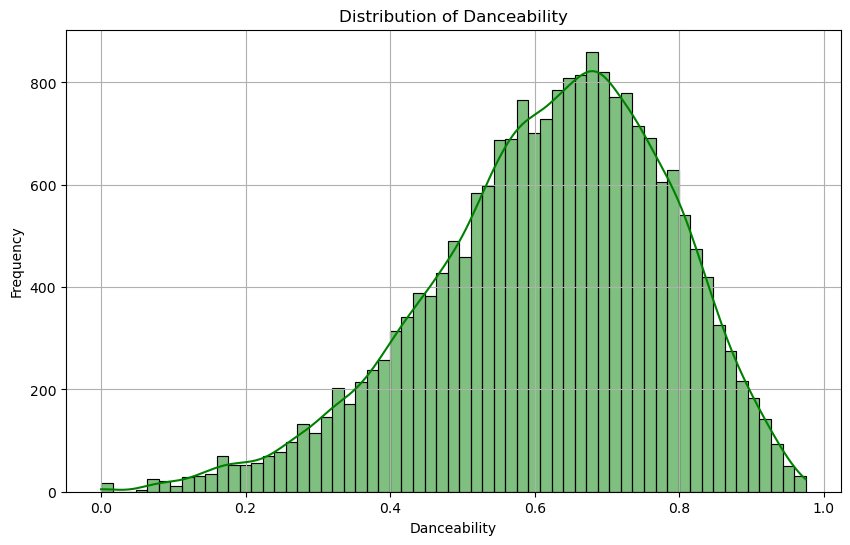

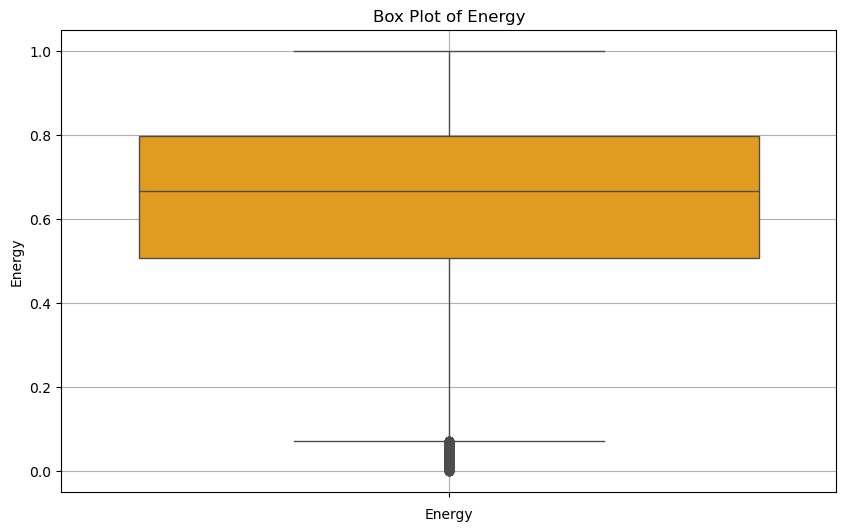

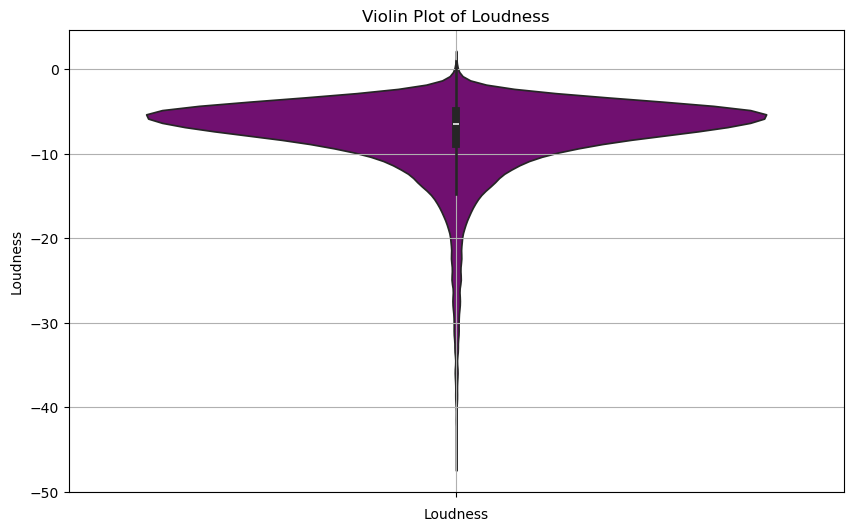

In [5]:
import seaborn as sns

# Histogram of Danceability
plt.figure(figsize=(10, 6))
sns.histplot(data['Danceability'], kde=True, color='green')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Box plot of Energy
plt.figure(figsize=(10, 6))
sns.boxplot(data['Energy'], color='orange')
plt.title('Box Plot of Energy')
plt.xlabel('Energy')
plt.grid(True)
plt.show()

# Violin plot of Loudness
plt.figure(figsize=(10, 6))
sns.violinplot(data['Loudness'], color='purple')
plt.title('Violin Plot of Loudness')
plt.xlabel('Loudness')
plt.grid(True)
plt.show()


In [10]:
pip install datasketch

Note: you may need to restart the kernel to use updated packages.


In [12]:
!pip install networkx pandas


In [15]:
def trailing_zeros(hash_value):
    """
    Count the number of trailing zeros in the binary representation of a hash value.
    """
    count = 0
    for bit in reversed(bin(hash_value)):
        if bit == '0':
            count += 1
        else:
            break
    return count

distinct_values = set(data['Artist'])
max_trailing_zeros = -1
for val in distinct_values:
    hash_value = hash(val)
    num_trailing_zeros = trailing_zeros(hash_value)
    if num_trailing_zeros > max_trailing_zeros:
        max_trailing_zeros = num_trailing_zeros


estimated_cardinality = 2 ** max_trailing_zeros
print("Estimated cardinality of 'Artist' column:", estimated_cardinality)


Estimated cardinality of 'Artist' column: 16384


       Danceability        Energy      Loudness       Valence         Tempo
count  20716.000000  20716.000000  20716.000000  20716.000000  20716.000000
mean       0.619777      0.635250     -7.671680      0.529853    120.638340
std        0.165272      0.214147      4.632749      0.245441     29.579018
min        0.000000      0.000020    -46.251000      0.000000      0.000000
25%        0.518000      0.507000     -8.858000      0.339000     97.002000
50%        0.637000      0.666000     -6.536000      0.537000    119.965000
75%        0.740250      0.798000     -4.931000      0.726250    139.935000
max        0.975000      1.000000      0.920000      0.993000    243.372000
              Danceability    Energy  Loudness   Valence     Tempo
Danceability      1.000000  0.236596  0.353408  0.465756 -0.065943
Energy            0.236596  1.000000  0.744845  0.389158  0.157383
Loudness          0.353408  0.744845  1.000000  0.311578  0.144766
Valence           0.465756  0.389158  0.311578  

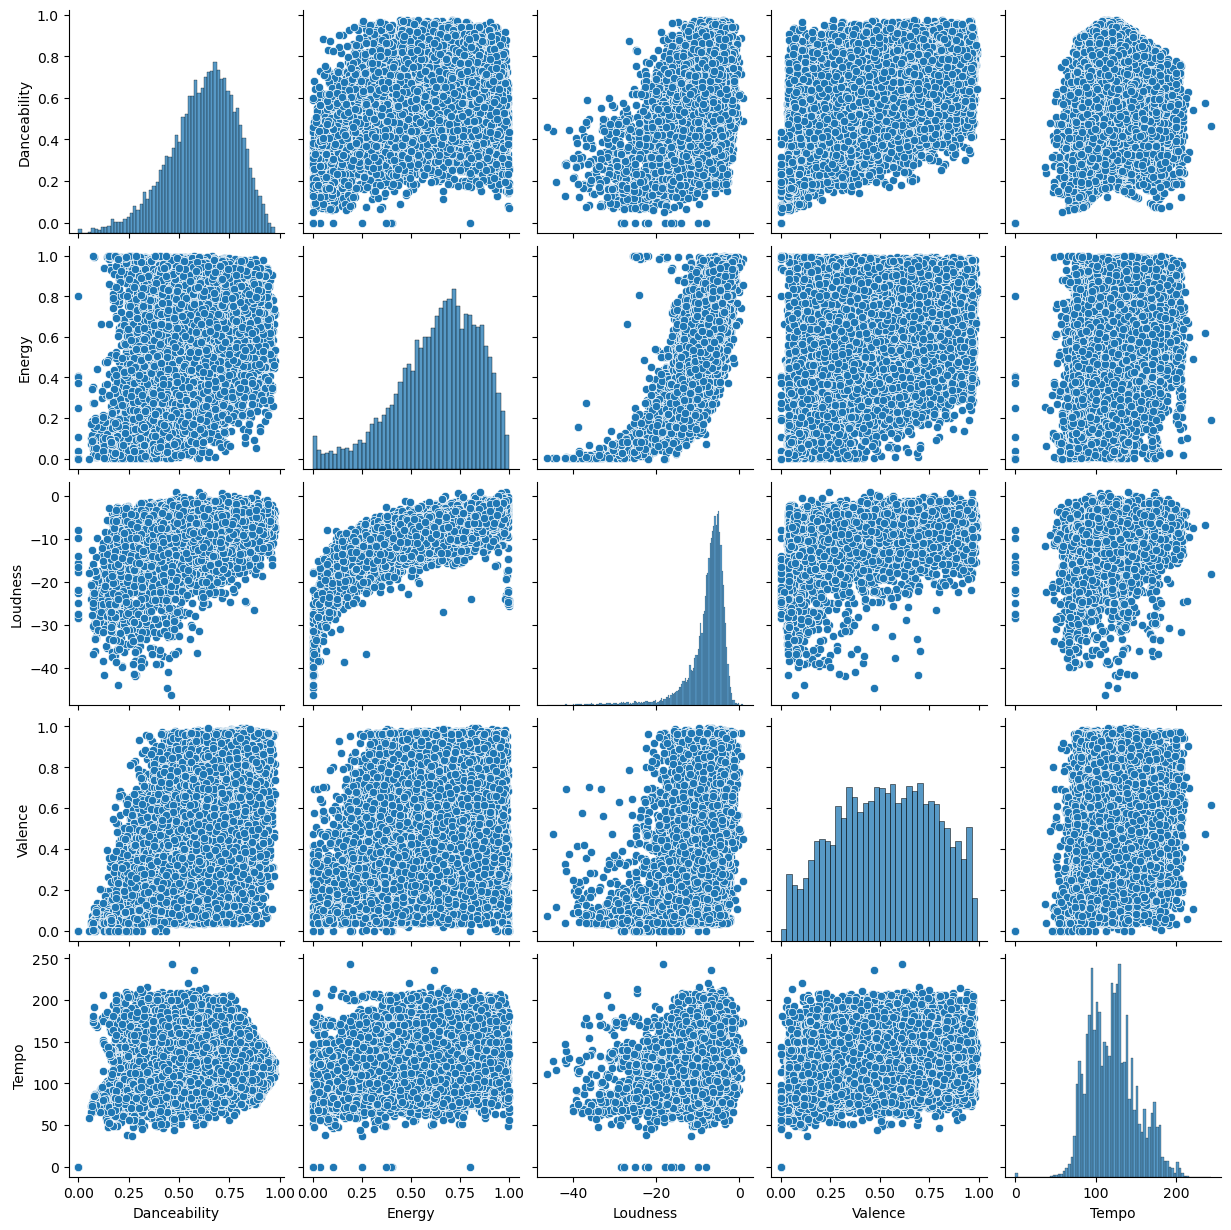

In [17]:
# Summary statistics
summary_stats = data.describe()
print(summary_stats)

# Remove non-numeric columns
numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
print(correlation_matrix)


# Pairplot for visual exploration
sns.pairplot(data)
plt.show()


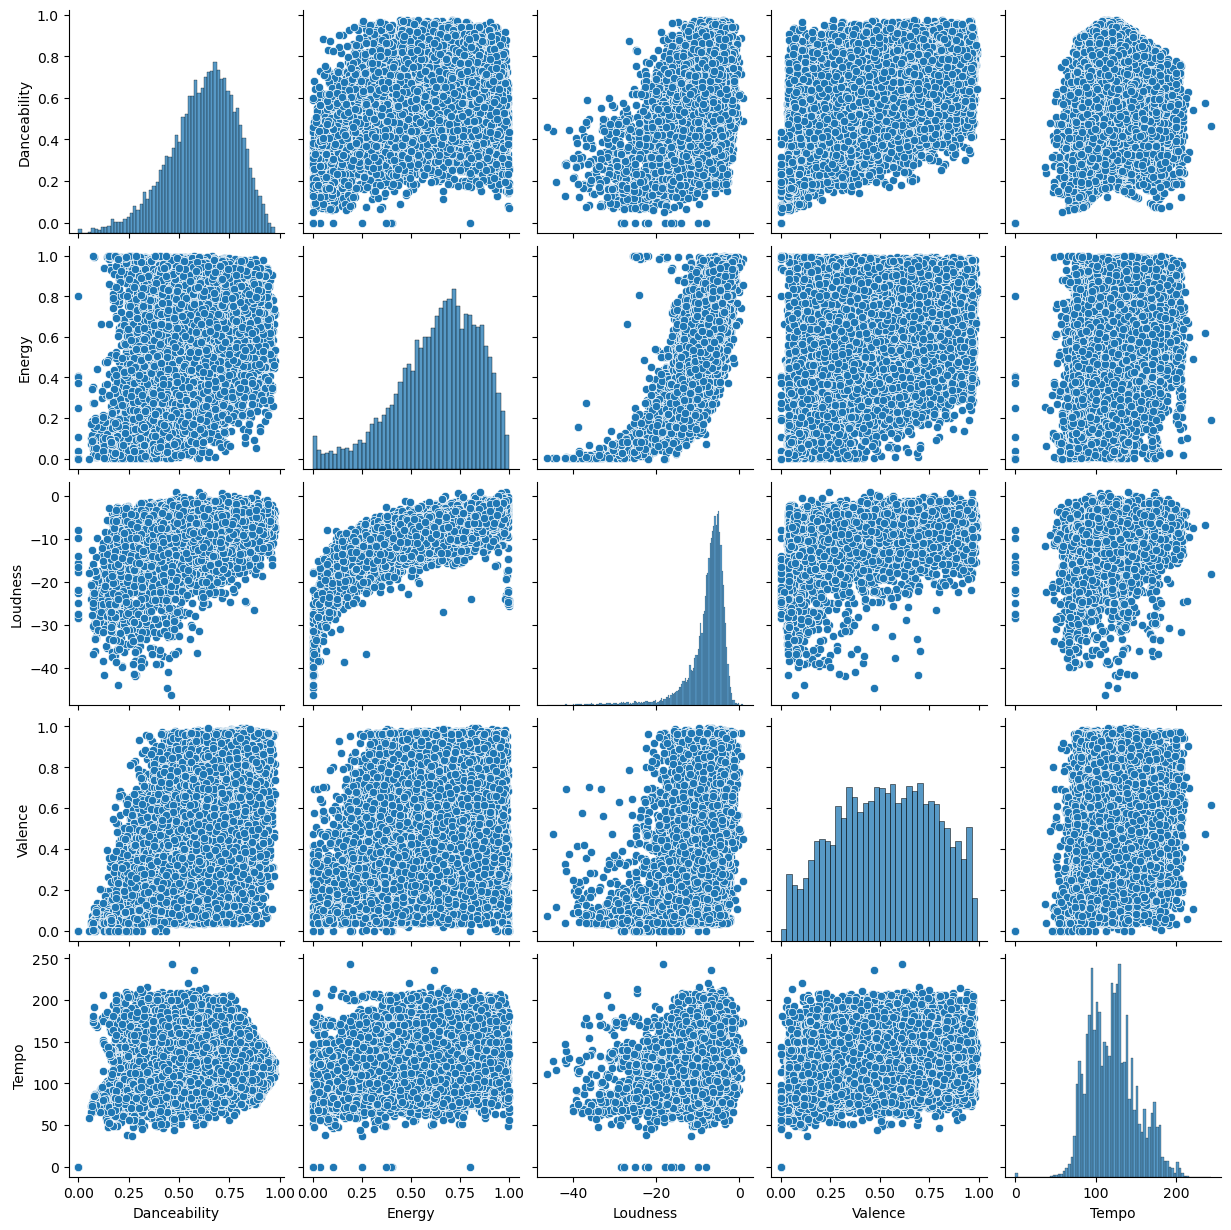

In [18]:
# Pairplot for visual exploration
sns.pairplot(data)
plt.show()


In [23]:
import networkx as nx

# Create the graph
G = nx.Graph()

# Add nodes
for _, row in sampled_data.iterrows():
    G.add_node(row['Track'], artist=row['Artist'], danceability=row['Danceability'], energy=row['Energy'])

# Group by artist and add edges within each group
artist_groups = sampled_data.groupby('Artist')['Track'].apply(list)

for tracks in artist_groups:
    for i in range(len(tracks)):
        for j in range(i + 1, len(tracks)):
            G.add_edge(tracks[i], tracks[j])


C:\Users\Manoj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12471 (\N{KATAKANA LETTER SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Manoj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Manoj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12477 (\N{KATAKANA LETTER SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Manoj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12465 (\N{KATAKANA LETTER KE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Manoj\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12441 (\N{COMBINING KATAKANA-HIRAGANA VOICED SOUND MARK}) missing from current font.
  fig.canvas.print_figure

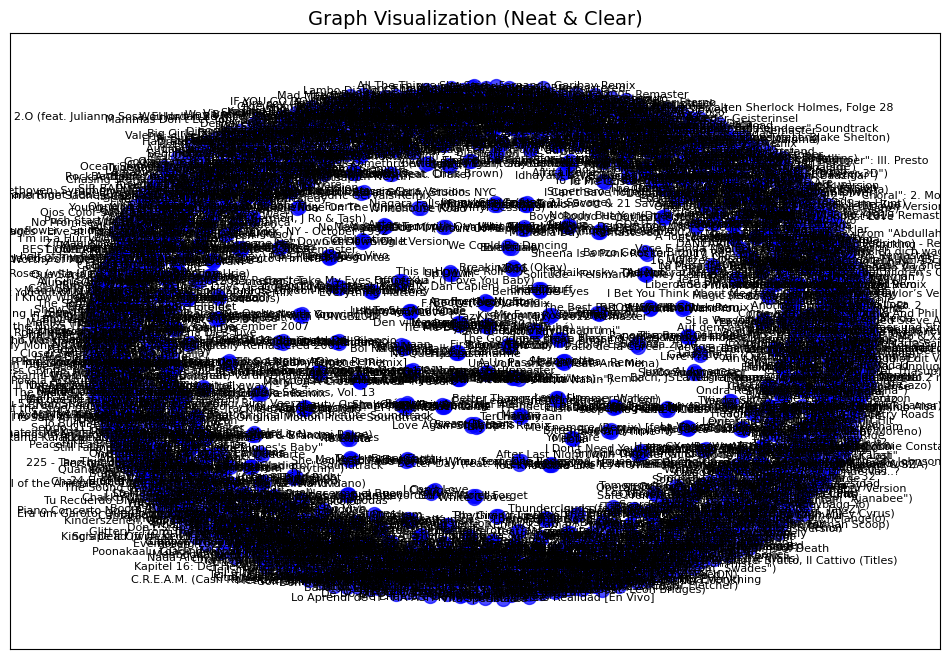

In [99]:
import networkx as nx
import matplotlib.pyplot as plt

# === Step 1: Visualize the Existing Graph ===
plt.figure(figsize=(12, 8))  # Set figure size

# Generate a layout for better clarity
pos = nx.spring_layout(G, seed=42)  # Spring layout for even spacing

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=100, node_color="blue", alpha=0.7)

# Draw edges
nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.5, width=0.8)

# Draw labels (optional, can be removed if too cluttered)
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

# Set title
plt.title("Graph Visualization (Neat & Clear)", fontsize=14)

# Show the plot
plt.show()


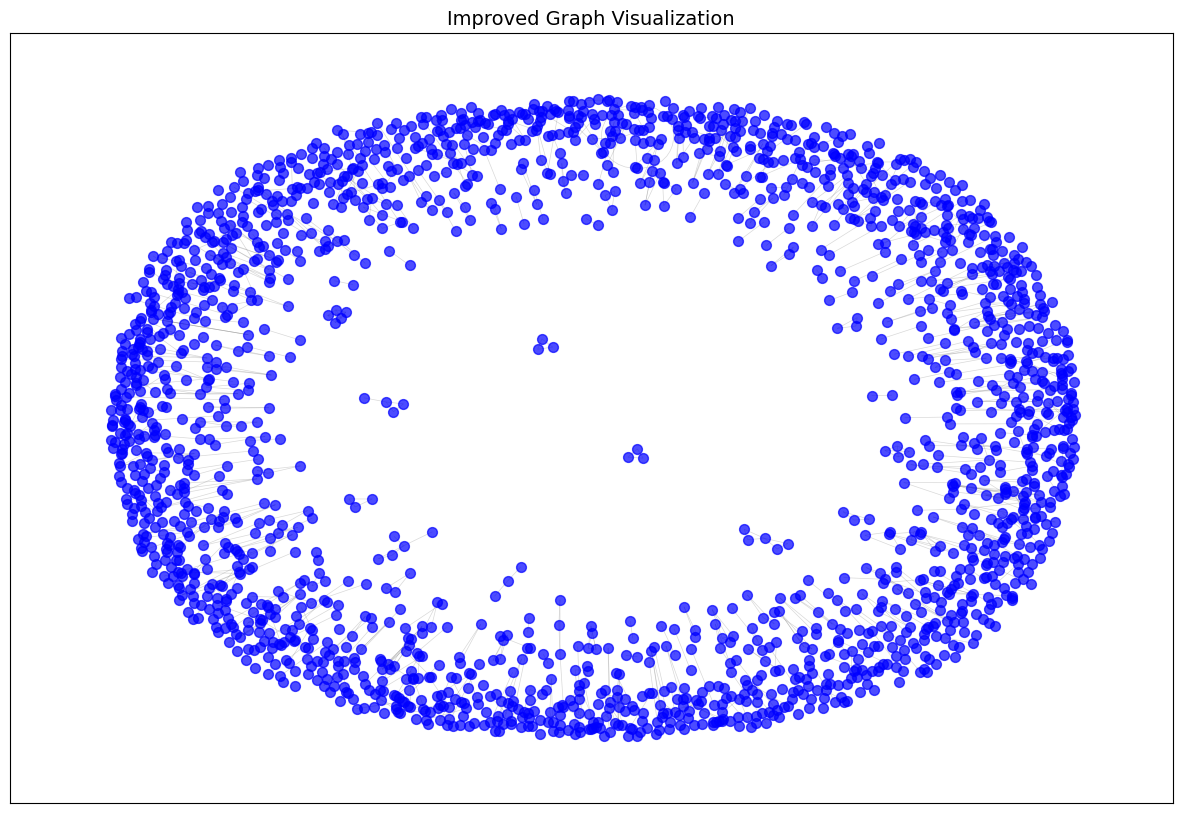

In [101]:
import networkx as nx
import matplotlib.pyplot as plt

# === Step 1: Define a clear layout ===
plt.figure(figsize=(15, 10))  # Larger figure size for better spacing
pos = nx.spring_layout(G, seed=42, k=0.1)  # Adjust k to spread nodes

# === Step 2: Draw Nodes and Edges ===
nx.draw_networkx_nodes(G, pos, node_size=50, node_color="blue", alpha=0.7)  # Smaller nodes
nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.3, width=0.5)  # Thinner edges

# === Step 3: Show labels only for important nodes ===
degree = dict(G.degree())
important_nodes = [node for node in degree if degree[node] > 5]  # Adjust threshold
nx.draw_networkx_labels(G, pos, labels={node: node for node in important_nodes}, font_size=8, font_color="black")

# === Step 4: Show final plot ===
plt.title("Improved Graph Visualization", fontsize=14)
plt.show()


In [27]:
pip install wordcloud


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.2 kB 653.6 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/301.2 kB 558.5 kB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.2 kB 525.1 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/301.2 kB 655.8 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/301.2 kB 701.4 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/301.2 kB 655.1 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/301.2 kB 714.4 kB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 775.9 kB/s eta 0:00:00


In [29]:
!pip install wordcloud

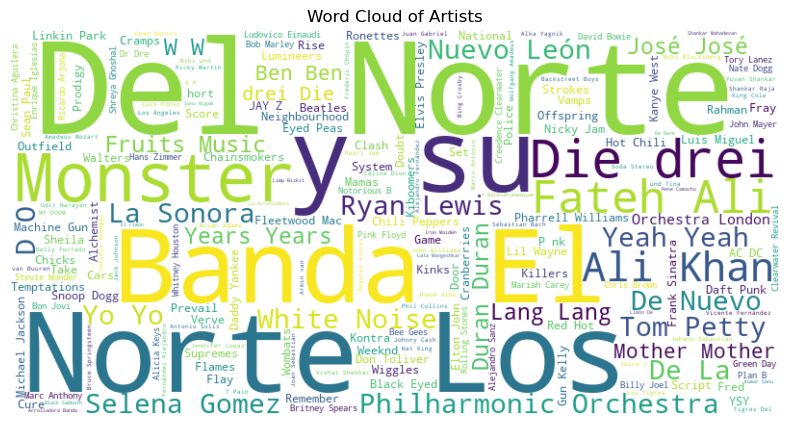

In [31]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('Spotify_Youtube.csv')

# Combine all artist names or track names into a single string
text = ' '.join(data['Artist'].dropna().astype(str).tolist())  # You can also use 'Track' column

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Artists')
plt.show()


In [35]:
pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   --- ----------------------------------- 61.4/624.3 kB 409.6 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/624.3 kB 595.3 kB/s eta 0:00:01
   -------- ----------------------------- 143.4/624.3 kB 655.8 kB/s eta 0:00:01
   ----------- -------------------------- 194.6/624.3 kB 695.5 kB/s eta 0:00:01
   --------------- ---------------------- 256.0/624.3 kB 787.7 kB/s eta 0:00:01
   --------------- ---------------------- 256.0/624.3 kB 787.7 kB/s eta 0:00:01
   --------------- ---------------------- 256.0/624.3 kB 787.7 kB/s eta 0:00:01
   --------------- ---------------------- 256.0/624.3 kB 787.7 kB/s eta 0:00:01
   --------------- ---------------------- 256.0/624.3 kB 787.7 kB/s eta 0:00:01
   --------------- ---------------------- 256.0/624.3 kB 787.7 k

In [36]:
!pip install textblob

In [39]:
import pandas as pd
from textblob import TextBlob

# Load your dataset (replace 'Spotify_Youtube.csv' with your actual file path)
data = pd.read_csv('Spotify_Youtube.csv')



data1 = pd.DataFrame({     'Comment': [
        'I love this song!',
        'This track is terrible.',
        'Amazing performance by the artist.'
     ]
 })

# Function to calculate sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply the function to the 'Comment' column
data1['Sentiment'] = data1['Comment'].apply(get_sentiment)

# Classify sentiment as positive, negative, or neutral
data1['Sentiment_Class'] = data1['Sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display the first few rows with sentiment
print(data1[['Comment', 'Sentiment', 'Sentiment_Class']])


                              Comment  Sentiment Sentiment_Class
0                   I love this song!      0.625        positive
1             This track is terrible.     -1.000        negative
2  Amazing performance by the artist.      0.600        positive


In [41]:
import pandas as pd
import networkx as nx

# Load your dataset
data = pd.read_csv('Spotify_Youtube.csv')

# Create the graph
G = nx.Graph()

# Add nodes with attributes
for _, row in sampled_data.iterrows():
    G.add_node(row['Track'], artist=row['Artist'], danceability=row['Danceability'], energy=row['Energy'])

# Group by artist and add edges within each group
artist_groups = sampled_data.groupby('Artist')['Track'].apply(list)

for tracks in artist_groups:
    for i in range(len(tracks)):
        for j in range(i + 1, len(tracks)):
            G.add_edge(tracks[i], tracks[j])

# Export the graph to GEXF format
nx.write_gexf(G, 'spotify_youtube_network.gexf')

print("Network exported to spotify_youtube_network.gexf")


Network exported to spotify_youtube_network.gexf


In [43]:
import random
import networkx as nx


# Randomly sample node pairs
node_pairs = random.sample(list(nx.non_edges(G)), 10)

# Compute Jaccard Coefficients
jaccard_coeffs = list(nx.jaccard_coefficient(G, node_pairs))

# Print Jaccard Coefficients for the sampled node pairs
print(f"Jaccard Coefficients (sample): {jaccard_coeffs}")


Jaccard Coefficients (sample): [('Coffee', 'Estrechez De Corazón', 0.0), ('Get Down On It - Single Version', 'Come Back to Us', 0.0), ('Mad Mad World (feat. Sizzla Kalonji & Collie Buddz)', 'Long Live Cowgirls (with Cody Johnson)', 0), ('Payphone', 'goverment hooker (sped up) - tiktok version', 0.0), ('La parte de adelante', 'Cash In Cash Out', 0.0), ('MONDAY (feat. Shiva & Michelangelo)', 'Bach, JS : Well-Tempered Clavier Book 1 : Prelude No.2 in C minor BWV847', 0), ('Champion (feat. Travis Scott)', 'BOOM', 0.0), ('Ovule (feat. Shygirl) - Sega Bodega Remix', 'Ya No Vuelvas (Versión Cuarteto)', 0.0), ('Complicado', 'Something to Someone', 0), ('Comprometida', "It's Over Now", 0.0)]


In [97]:
import networkx as nx
import itertools

def apply_girvan_newman(G, num_communities=2):
    comp = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.islice(comp, num_communities - 1)
    communities = tuple(sorted(c) for c in next(limited))
    return communities

# Assuming you have already defined and populated the graph G
# Here we are creating a subgraph from a sample of nodes
sample_nodes = set(sampled_data['Track'])  # Adjust the sampling fraction as needed
subG = G.subgraph(sample_nodes)

# Apply the Girvan-Newman algorithm
communities = apply_girvan_newman(subG)

# Count the number of communities
num_communities = len(communities)

# Print the detected communities and their count
print(f"Detected communities: {communities}")
print(f"Number of communities detected: {num_communities}")


Detected communities: (['Garis Terdepan', 'Seperti Kita Dulu'], ['Taking You Home', 'The Boys Of Summer'], ['Shy Away'], ['It’s My Birthday'], ['I Want Your Soul'], ['Abrázame Muy Fuerte', 'Querida'], ['Nose On The Grindstone (OurVinyl Sessions)', 'Whitehouse Road'], ['Hosanna', 'So Will I (100 Billion X)', 'What A Beautiful Name - Live'], ['The One That Got Away', 'Unconditionally'], ["Emperor's New Clothes", 'High Hopes'], ['Rebelde'], ['All Star - Owl City Remix', 'Stoned'], ['Becoming one of "The People" Becoming one with Neytiri', "Jake's first flight"], ['Plain Jane REMIX (feat. Nicki Minaj)', 'Work REMIX (feat. A$AP Rocky, French Montana, Trinidad James & ScHoolboy Q)'], ['Inside', 'Shattered Dreams'], ['Everything Matters', 'Exist for Love', 'Half the World Away'], ['Aston Martin Truck', 'Twin (feat. Lil Durk)'], ['Nada'], ['Burn The House Down', 'The DJ Is Crying For Help'], ['Hay Que Vivir El Momento'], ['Los No Tan Tristes', 'Quiéreme Así'], ['LA JOAQUI | Mission 08'], ['Cha

In [103]:
import networkx as nx
import itertools

def apply_girvan_newman(G, num_communities=2):
    comp = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.islice(comp, num_communities - 1)
    communities = tuple(sorted(c) for c in next(limited))
    return communities

# Assuming you have already defined and populated the graph G
# Here we are creating a subgraph from a sample of nodes
sample_nodes = set(sampled_data['Track'])  # Adjust the sampling fraction as needed
subG = G.subgraph(sample_nodes)

# Apply the Girvan-Newman algorithm
communities = apply_girvan_newman(subG)

# Count the number of communities
num_communities = len(communities)

# Print the detected communities in a structured way
print(f"\n🔹 Number of communities detected: {num_communities}\n")

for i, community in enumerate(communities, 1):
    print(f"🟢 Community {i} (Size: {len(community)} nodes):")
    print(", ".join(community))  # Print nodes in the community
    print("-" * 80)  # Separator for better readability



🔹 Number of communities detected: 1312

🟢 Community 1 (Size: 2 nodes):
Garis Terdepan, Seperti Kita Dulu
--------------------------------------------------------------------------------
🟢 Community 2 (Size: 2 nodes):
Taking You Home, The Boys Of Summer
--------------------------------------------------------------------------------
🟢 Community 3 (Size: 1 nodes):
Shy Away
--------------------------------------------------------------------------------
🟢 Community 4 (Size: 1 nodes):
It’s My Birthday
--------------------------------------------------------------------------------
🟢 Community 5 (Size: 1 nodes):
I Want Your Soul
--------------------------------------------------------------------------------
🟢 Community 6 (Size: 2 nodes):
Abrázame Muy Fuerte, Querida
--------------------------------------------------------------------------------
🟢 Community 7 (Size: 2 nodes):
Nose On The Grindstone (OurVinyl Sessions), Whitehouse Road
------------------------------------------------------

In [105]:
import networkx as nx
import itertools

def apply_girvan_newman(G, num_communities=2):
    comp = nx.algorithms.community.centrality.girvan_newman(G)
    limited = itertools.islice(comp, num_communities - 1)
    communities = tuple(sorted(c) for c in next(limited))
    return communities

# Assuming you have already defined and populated the graph G
# Here we are creating a subgraph from a sample of nodes
sample_nodes = set(sampled_data['Track'])  # Adjust the sampling fraction as needed
subG = G.subgraph(sample_nodes)

# Apply the Girvan-Newman algorithm
communities = apply_girvan_newman(subG)

# Count the number of communities
num_communities = len(communities)

# Print the detected communities in a structured way
print(f"\n🔹 Number of communities detected: {num_communities}\n")

for i, community in enumerate(communities, 1):
    print(f"🟢 Community {i} (Size: {len(community)} nodes):")
    print(list(community))  # Printing as a proper list
    print("-" * 80)  # Separator for better readability



🔹 Number of communities detected: 1312

🟢 Community 1 (Size: 2 nodes):
['Garis Terdepan', 'Seperti Kita Dulu']
--------------------------------------------------------------------------------
🟢 Community 2 (Size: 2 nodes):
['Taking You Home', 'The Boys Of Summer']
--------------------------------------------------------------------------------
🟢 Community 3 (Size: 1 nodes):
['Shy Away']
--------------------------------------------------------------------------------
🟢 Community 4 (Size: 1 nodes):
['It’s My Birthday']
--------------------------------------------------------------------------------
🟢 Community 5 (Size: 1 nodes):
['I Want Your Soul']
--------------------------------------------------------------------------------
🟢 Community 6 (Size: 2 nodes):
['Abrázame Muy Fuerte', 'Querida']
--------------------------------------------------------------------------------
🟢 Community 7 (Size: 2 nodes):
['Nose On The Grindstone (OurVinyl Sessions)', 'Whitehouse Road']
------------------

In [47]:
import pandas as pd
import networkx as nx
from networkx.algorithms.community import k_clique_communities

# Load your dataset
data = pd.read_csv('Spotify_Youtube.csv')

# Sampled data (for demonstration, assuming sampled_data is defined)
# Replace with your actual sampled_data DataFrame
sampled_data = data.sample(frac=0.1, random_state=42)

# Create the graph
G = nx.Graph()

# Add nodes with attributes
for _, row in sampled_data.iterrows():
    G.add_node(row['Track'], artist=row['Artist'], danceability=row['Danceability'], energy=row['Energy'])

# Group by artist and add edges within each group
artist_groups = sampled_data.groupby('Artist')['Track'].apply(list)

for tracks in artist_groups:
    for i in range(len(tracks)):
        for j in range(i + 1, len(tracks)):
            G.add_edge(tracks[i], tracks[j])

# Apply Clique Percolation Method
k = 3  # Define the size of the clique
cliques = list(k_clique_communities(G, k))

# Print the detected overlapping communities
print(f"Overlapping communities based on {k}-cliques: {list(cliques)}")


Overlapping communities based on 3-cliques: [frozenset({'Sabor a Mí', 'Nosotros', 'Toda Una Vida', 'Quizás, Quizás, Quizás'}), frozenset({"When All Is Said And Done - From 'Mamma Mia!' Original Motion Picture Soundtrack", "Slipping Through My Fingers - From 'Mamma Mia!' Original Motion Picture Soundtrack", 'Super Trouper'}), frozenset({'23 (With Ape Drums)', 'La Pared 720 (feat. Justin Quiles, Brray)', 'Fuera del Planeta'}), frozenset({"Still Don't Know My Name", 'Thunderclouds (feat. Sia, Diplo, and Labrinth)', 'Jealous'}), frozenset({'Ocean Of Tears', 'Love Again - Imanbek Remix', 'Sweet Dreams'}), frozenset({'Máquina do Tempo', 'Sem Dó', 'Antes'}), frozenset({'She Looks So Perfect', 'Me Myself & I', 'Teeth'}), frozenset({'Still Alive', 'Be Like That', 'Away From The Sun'}), frozenset({'Voy a Conquistarte', 'Pídeme (En Vivo)', 'Voy A Conquistarte'}), frozenset({'Driving Home for Christmas', 'The Blue Cafe', 'Looking for the Summer'}), frozenset({'Teri Fariyad', 'Aise Kyun - Ghazal Ve

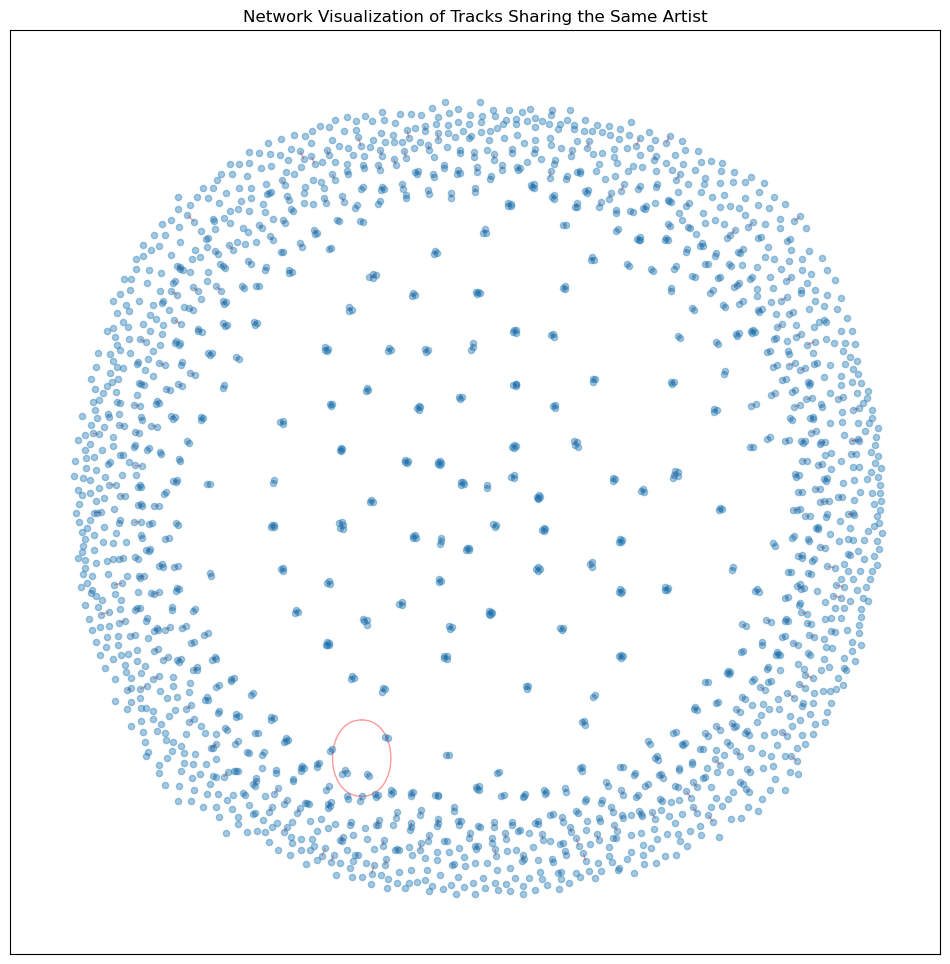

In [49]:
import matplotlib.pyplot as plt

# Network Visualization
plt.figure(figsize=(12, 12))
nx.draw_networkx(G, node_size=20, edge_color='red', with_labels=False, alpha=0.4)
plt.title('Network Visualization of Tracks Sharing the Same Artist')
plt.show()


In [50]:
import networkx as nx

# Assuming G is your graph

# Average Degree
average_degree = sum(dict(G.degree()).values()) / len(G)
print("Average Degree:", average_degree)

# Clustering Coefficient
clustering_coefficient = nx.average_clustering(G)
print("Clustering Coefficient:", clustering_coefficient)

# Diameter (Warning: Computationally expensive for large graphs)
try:
    diameter = nx.diameter(G)
    print("Diameter:", diameter)
except nx.NetworkXError:
    print("Diameter calculation is not feasible for large graphs.")

# Density
density = nx.density(G)
print("Density:", density)


Average Degree: 0.9474717722140402
Clustering Coefficient: 0.2484863361152021
Diameter calculation is not feasible for large graphs.
Density: 0.0004653594166080748


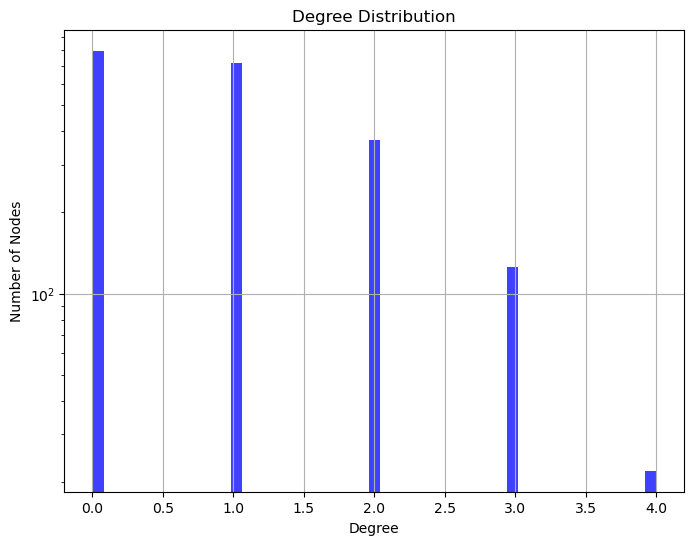

In [51]:
import numpy as np

# Degree Distribution
degrees = [degree for node, degree in G.degree()]
plt.figure(figsize=(8, 6))
plt.hist(degrees, bins=np.linspace(0, max(degrees), 50), alpha=0.75, color='blue')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.yscale('log')
plt.grid(True)
plt.show()


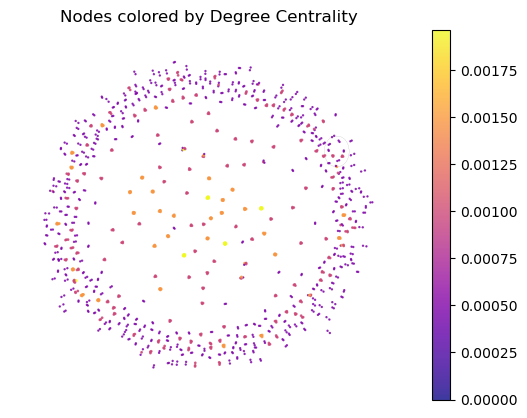

In [56]:
pos = nx.spring_layout(G)
degree_centrality = nx.degree_centrality(G)
nodes = nx.draw_networkx_nodes(G, pos, node_size=[v * 1000 for v in degree_centrality.values()], cmap=plt.cm.plasma, node_color=list(degree_centrality.values()), alpha=0.8)
nx.draw_networkx_edges(G, pos, width=0.1, alpha=0.5)
plt.title('Nodes colored by Degree Centrality')
plt.colorbar(nodes)
plt.axis('off')
plt.show()


In [57]:
# Network Density
density = nx.density(G)
print(f"Network density: {density}")

# Diameter and Average Distance
if nx.is_connected(G):
    diameter = nx.diameter(G)
    avg_distance = nx.average_shortest_path_length(G)
else:
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    diameter = nx.diameter(subgraph)
    avg_distance = nx.average_shortest_path_length(subgraph)
print(f"Diameter (largest component): {diameter}, Average distance (largest component): {avg_distance}")

# Average Degree
degrees = dict(G.degree())
average_degree = sum(degrees.values()) / len(degrees)
print(f"Average degree: {average_degree}")


Network density: 0.0004653594166080748
Diameter (largest component): 1, Average distance (largest component): 1.0
Average degree: 0.9474717722140402


In [60]:
import networkx as nx

# Assuming G is your existing graph
# Remove the random graph generation

# Compute centrality measures sequentially
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, k=100)  # Sampling for speed-up
eigenvector_centrality = nx.eigenvector_centrality(G)
pagerank_centrality = nx.pagerank(G)
katz_centrality = nx.katz_centrality_numpy(G, alpha=0.005)  # Faster than nx.katz_centrality()

# Print sample results
print(f"Degree centrality (sample): {list(degree_centrality.items())[:5]}")
print(f"Closeness centrality (sample): {list(closeness_centrality.items())[:5]}")
print(f"Betweenness centrality (sample): {list(betweenness_centrality.items())[:5]}")
print(f"Eigenvector centrality (sample): {list(eigenvector_centrality.items())[:5]}")
print(f"PageRank centrality (sample): {list(pagerank_centrality.items())[:5]}")
print(f"Katz centrality (sample): {list(katz_centrality.items())[:5]}")


Degree centrality (sample): [('Seperti Kita Dulu', 0.0004911591355599214), ('Taking You Home', 0.0004911591355599214), ('Shy Away', 0.0), ('It’s My Birthday', 0.0), ('I Want Your Soul', 0.0)]
Closeness centrality (sample): [('Seperti Kita Dulu', 0.0004911591355599214), ('Taking You Home', 0.0004911591355599214), ('Shy Away', 0.0), ('It’s My Birthday', 0.0), ('I Want Your Soul', 0.0)]
Betweenness centrality (sample): [('Seperti Kita Dulu', 0.0), ('Taking You Home', 0.0), ('Shy Away', 0.0), ('It’s My Birthday', 0.0), ('I Want Your Soul', 0.0)]
Eigenvector centrality (sample): [('Seperti Kita Dulu', 4.2238121340858e-16), ('Taking You Home', 4.2238121340858e-16), ('Shy Away', 3.0732278057881923e-27), ('It’s My Birthday', 3.0732278057881923e-27), ('I Want Your Soul', 3.0732278057881923e-27)]
PageRank centrality (sample): [('Seperti Kita Dulu', 0.0007355008856211721), ('Taking You Home', 0.0007355008856211721), ('Shy Away', 0.00011038758071486422), ('It’s My Birthday', 0.00011038758071486422

In [62]:
print(f"Degree centrality (sample): {list(degree_centrality.items())[:5]}")

Degree centrality (sample): [('Seperti Kita Dulu', 0.0004911591355599214), ('Taking You Home', 0.0004911591355599214), ('Shy Away', 0.0), ('It’s My Birthday', 0.0), ('I Want Your Soul', 0.0)]


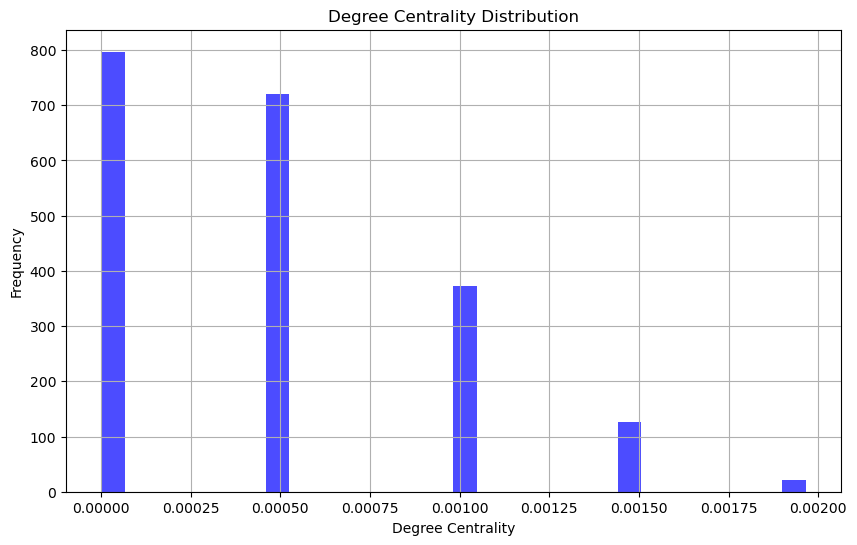

In [64]:
import matplotlib.pyplot as plt

# Degree Centrality
plt.figure(figsize=(10, 6))
plt.hist(list(degree_centrality.values()), bins=30, color='blue', alpha=0.7)
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


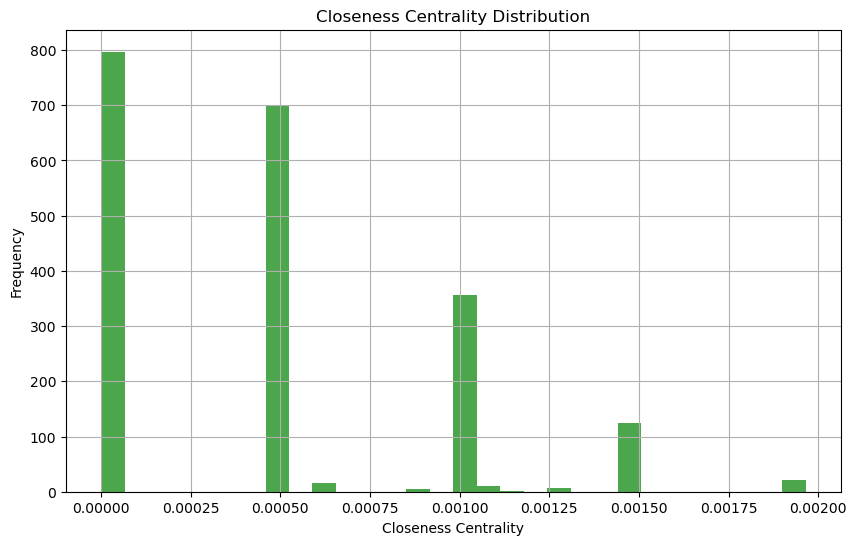

In [66]:
# Closeness Centrality
plt.figure(figsize=(10, 6))
plt.hist(list(closeness_centrality.values()), bins=30, color='green', alpha=0.7)
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


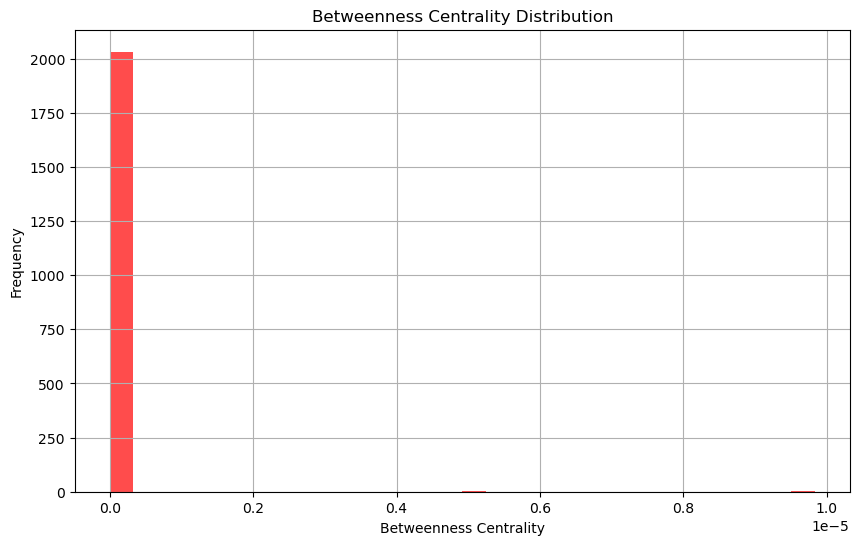

In [68]:
# Betweenness Centrality
plt.figure(figsize=(10, 6))
plt.hist(list(betweenness_centrality.values()), bins=30, color='red', alpha=0.7)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


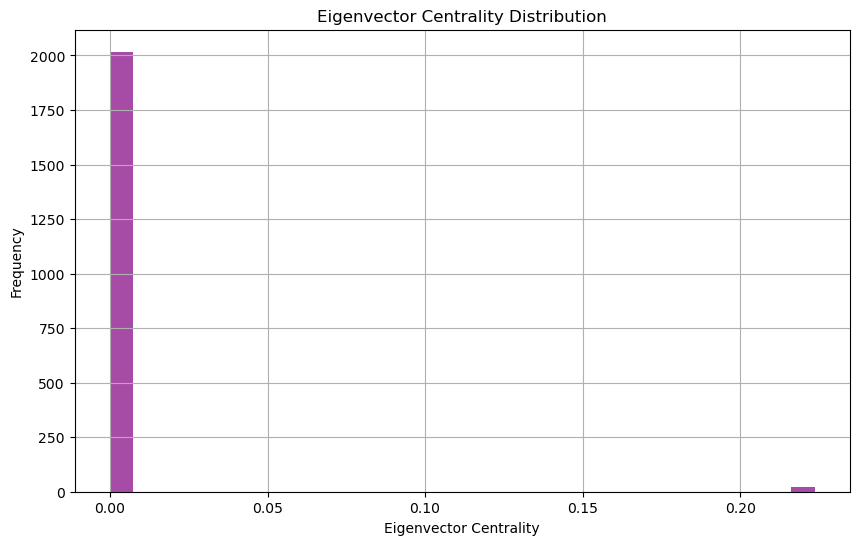

In [69]:
# Eigenvector Centrality
plt.figure(figsize=(10, 6))
plt.hist(list(eigenvector_centrality.values()), bins=30, color='purple', alpha=0.7)
plt.title('Eigenvector Centrality Distribution')
plt.xlabel('Eigenvector Centrality')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


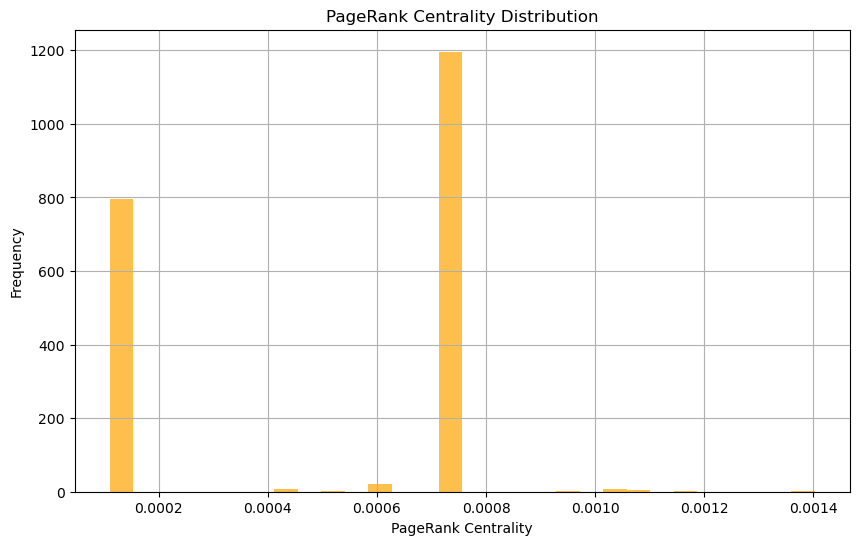

In [72]:
# PageRank Centrality
plt.figure(figsize=(10, 6))
plt.hist(list(pagerank_centrality.values()), bins=30, color='orange', alpha=0.7)
plt.title('PageRank Centrality Distribution')
plt.xlabel('PageRank Centrality')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


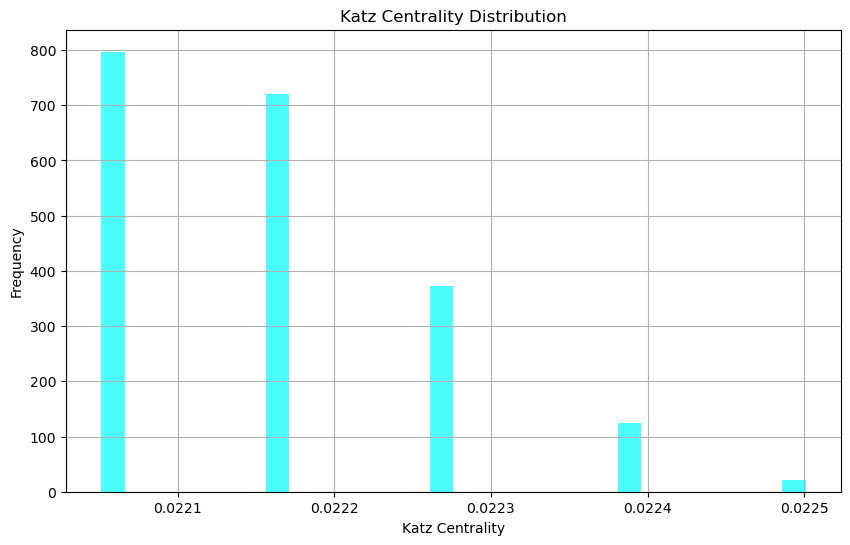

In [74]:
# Katz Centrality
plt.figure(figsize=(10, 6))
plt.hist(list(katz_centrality.values()), bins=30, color='cyan', alpha=0.7)
plt.title('Katz Centrality Distribution')
plt.xlabel('Katz Centrality')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [76]:
import networkx as nx

# Assuming G is your graph representing the Spotify and YouTube dataset
katz_centrality = nx.katz_centrality(G, alpha=0.1, beta=0.1)

# Print Katz centrality scores for each node
for node, centrality in katz_centrality.items():
    print(f"Node {node}: Katz Centrality = {centrality}")


Node Seperti Kita Dulu: Katz Centrality = 0.021857775772623343
Node Taking You Home: Katz Centrality = 0.021857775772623343
Node Shy Away: Katz Centrality = 0.01967199819732821
Node It’s My Birthday: Katz Centrality = 0.01967199819732821
Node I Want Your Soul: Katz Centrality = 0.01967199819732821
Node Querida: Katz Centrality = 0.021857775772623343
Node Whitehouse Road: Katz Centrality = 0.021857775772623343
Node What A Beautiful Name - Live: Katz Centrality = 0.022080814232464895
Node Unconditionally: Katz Centrality = 0.021857775772623343
Node High Hopes: Katz Centrality = 0.021857775772623343
Node Rebelde: Katz Centrality = 0.01967199819732821
Node All Star - Owl City Remix: Katz Centrality = 0.021857775772623343
Node Becoming one of "The People" Becoming one with Neytiri: Katz Centrality = 0.021857775772623343
Node Plain Jane REMIX (feat. Nicki Minaj): Katz Centrality = 0.021857775772623343
Node Shattered Dreams: Katz Centrality = 0.021857775772623343
Node Exist for Love: Katz Cen

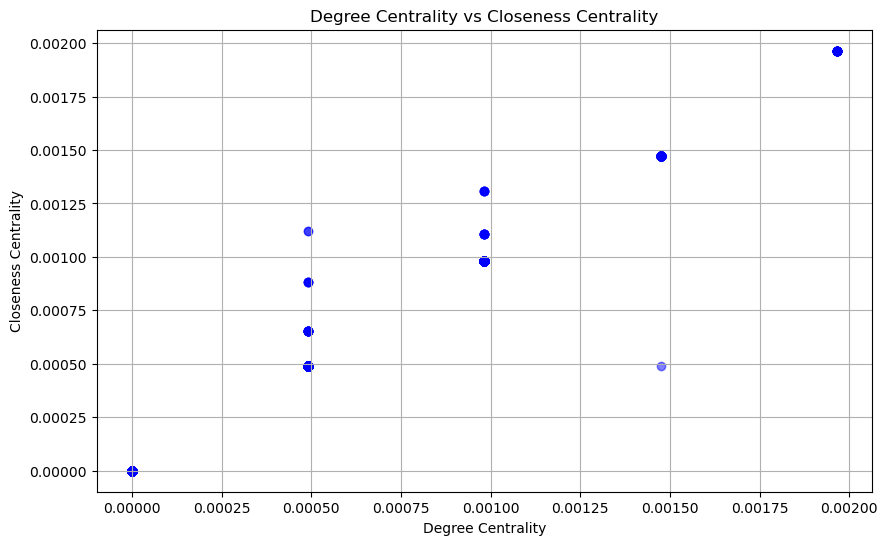

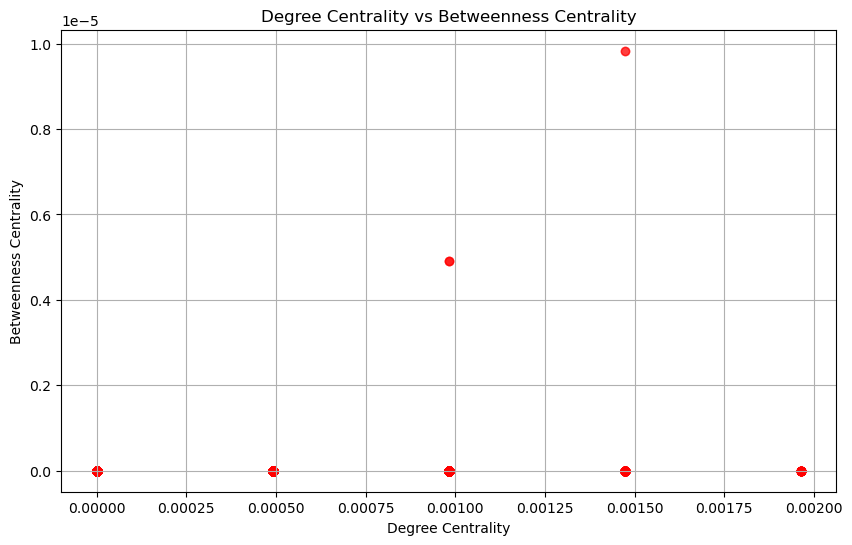

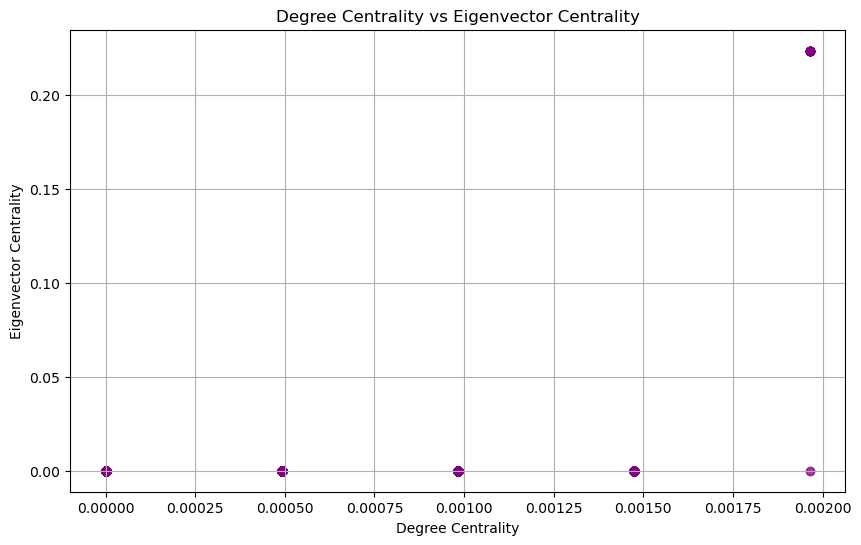

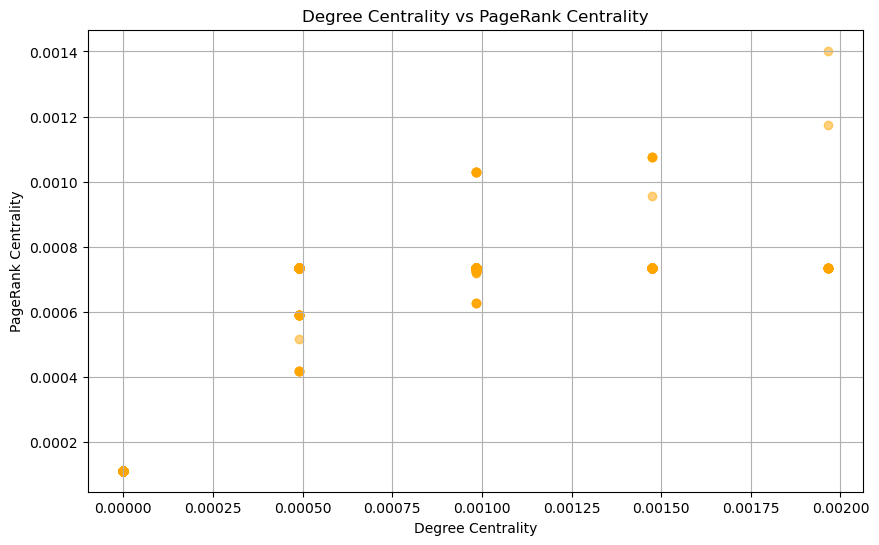

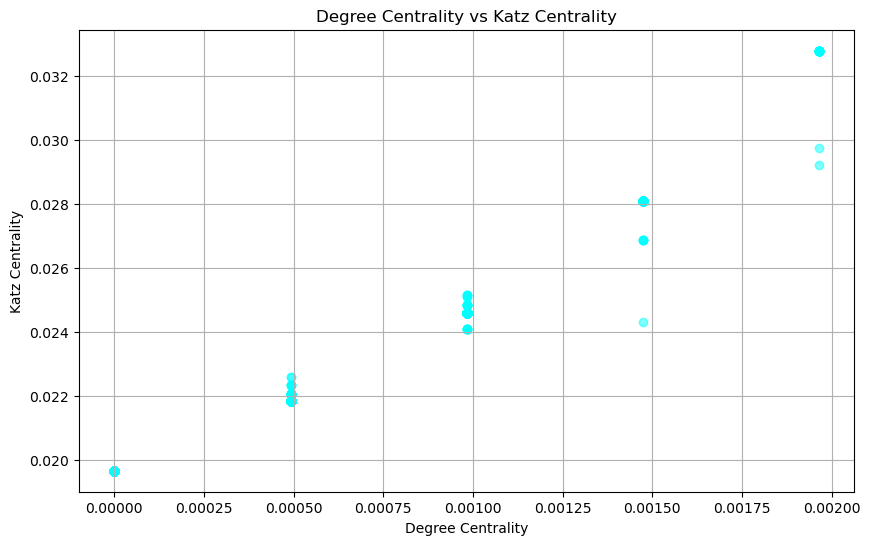

In [78]:
# Scatter plot of Degree vs Closeness Centrality
plt.figure(figsize=(10, 6))
plt.scatter(list(degree_centrality.values()), list(closeness_centrality.values()), alpha=0.5, color='blue')
plt.title('Degree Centrality vs Closeness Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Closeness Centrality')
plt.grid(True)
plt.show()

# Scatter plot of Degree vs Betweenness Centrality
plt.figure(figsize=(10, 6))
plt.scatter(list(degree_centrality.values()), list(betweenness_centrality.values()), alpha=0.5, color='red')
plt.title('Degree Centrality vs Betweenness Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Betweenness Centrality')
plt.grid(True)
plt.show()

# Scatter plot of Degree vs Eigenvector Centrality
plt.figure(figsize=(10, 6))
plt.scatter(list(degree_centrality.values()), list(eigenvector_centrality.values()), alpha=0.5, color='purple')
plt.title('Degree Centrality vs Eigenvector Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Eigenvector Centrality')
plt.grid(True)
plt.show()

# Scatter plot of Degree vs PageRank Centrality
plt.figure(figsize=(10, 6))
plt.scatter(list(degree_centrality.values()), list(pagerank_centrality.values()), alpha=0.5, color='orange')
plt.title('Degree Centrality vs PageRank Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('PageRank Centrality')
plt.grid(True)
plt.show()

# Scatter plot of Degree vs Katz Centrality
plt.figure(figsize=(10, 6))
plt.scatter(list(degree_centrality.values()), list(katz_centrality.values()), alpha=0.5, color='cyan')
plt.title('Degree Centrality vs Katz Centrality')
plt.xlabel('Degree Centrality')
plt.ylabel('Katz Centrality')
plt.grid(True)
plt.show()


In [80]:
# Display basic statistics
basic_stats = data.describe()
print(basic_stats)


         Unnamed: 0  Danceability        Energy           Key      Loudness  \
count  20718.000000  20716.000000  20716.000000  20716.000000  20716.000000   
mean   10358.500000      0.619777      0.635250      5.300348     -7.671680   
std     5980.915774      0.165272      0.214147      3.576449      4.632749   
min        0.000000      0.000000      0.000020      0.000000    -46.251000   
25%     5179.250000      0.518000      0.507000      2.000000     -8.858000   
50%    10358.500000      0.637000      0.666000      5.000000     -6.536000   
75%    15537.750000      0.740250      0.798000      8.000000     -4.931000   
max    20717.000000      0.975000      1.000000     11.000000      0.920000   

        Speechiness  Acousticness  Instrumentalness      Liveness  \
count  20716.000000  20716.000000      20716.000000  20716.000000   
mean       0.096456      0.291535          0.055962      0.193521   
std        0.111960      0.286299          0.193262      0.168531   
min        0

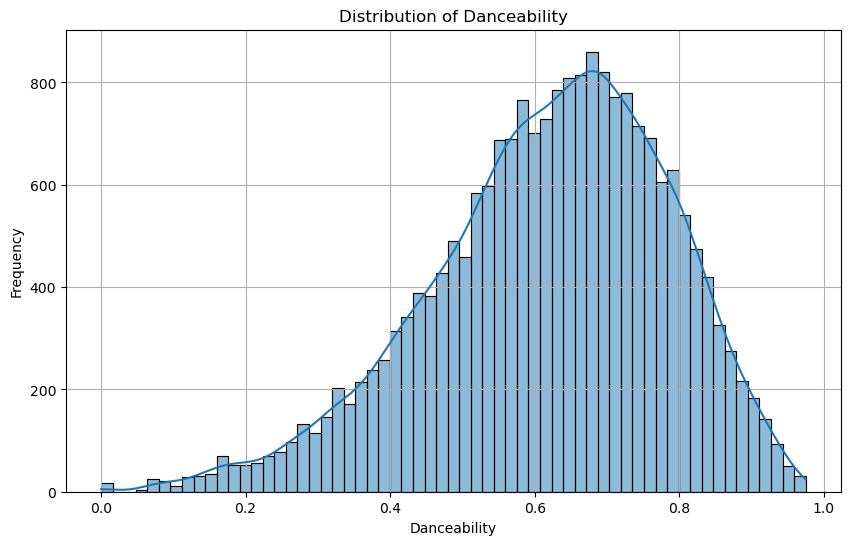

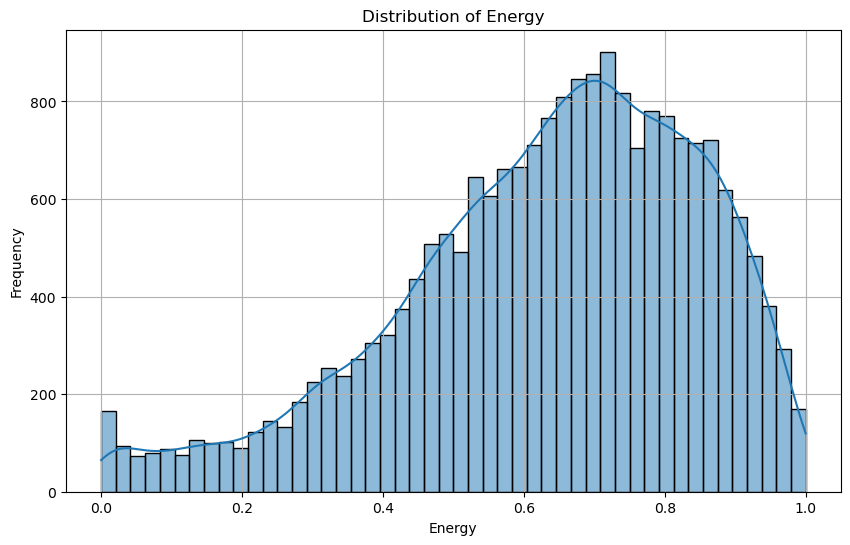

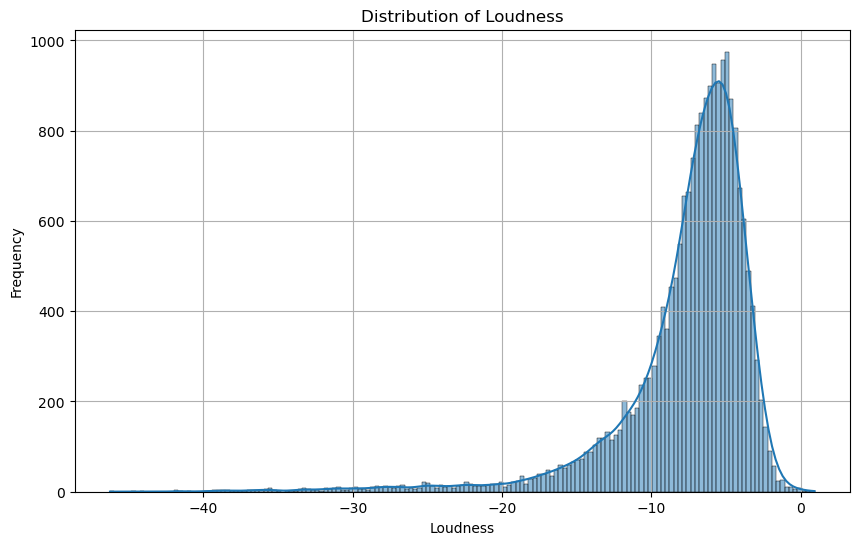

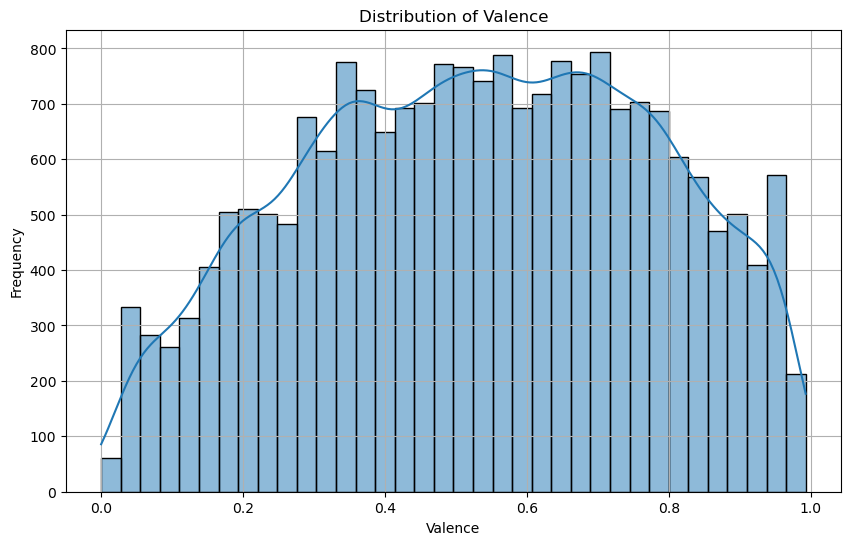

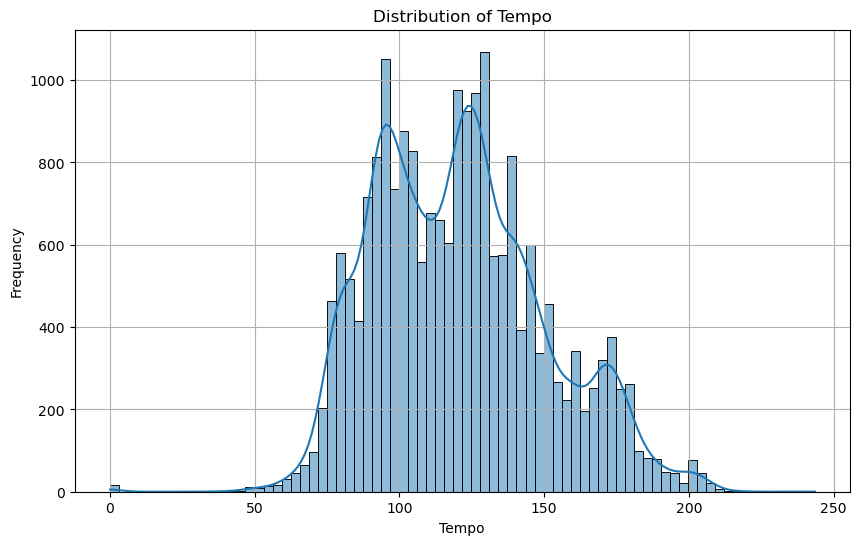

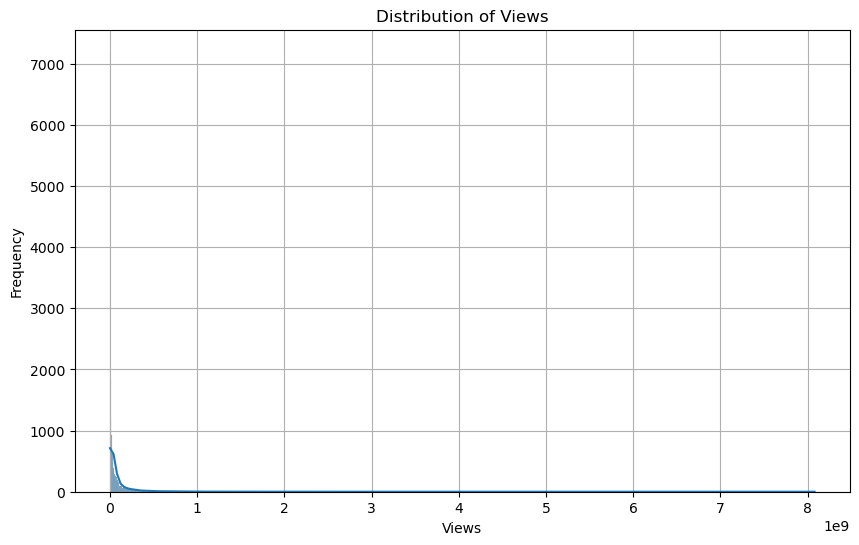

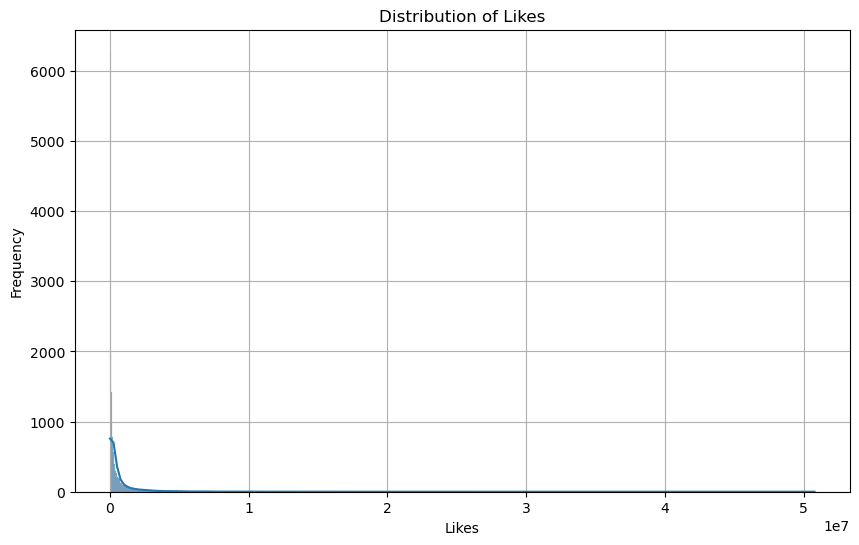

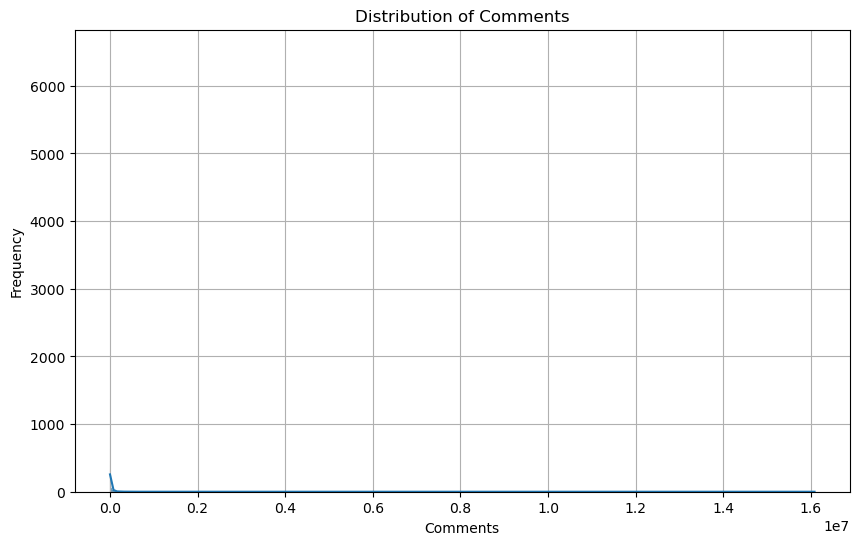

In [82]:
# Distribution plots for numerical features
numerical_features = ['Danceability', 'Energy', 'Loudness', 'Valence', 'Tempo', 'Views', 'Likes', 'Comments']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sb.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()